In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mejorando los gráficos por defecto

Existen algunas extensiones a los estilos gráficos que matplotlib ofrece, como SciencePlots (https://github.com/garrettj403/SciencePlots) aunque nosotros usaremos los estilos por defecto de matplotlib.

Podemos ver el listado de los estilos que vienen con matplotlib haciendo lo siguiente

In [ ]:
from matplotlib import style

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Luego elegimos alguno en particular usando ```sytyle.use```

In [ ]:
plt.style.use('bmh') # podés cambiar esto y jugar como quedan los gráficos

# Gráficos sencillos: Interfaz tipo Matlab

## Gráficos de línea

Para hacer un gráfico sencillo

In [ ]:
x = np.linspace(0,15,30) # un array usando linspace
y = np.sin(x) + 0.1*np.random.randn(len(x)) # una trigonométrica con ruido usando random de numpy

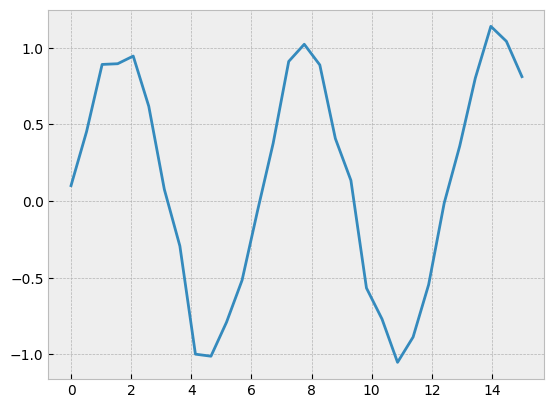

In [ ]:
plt.plot(x,y)

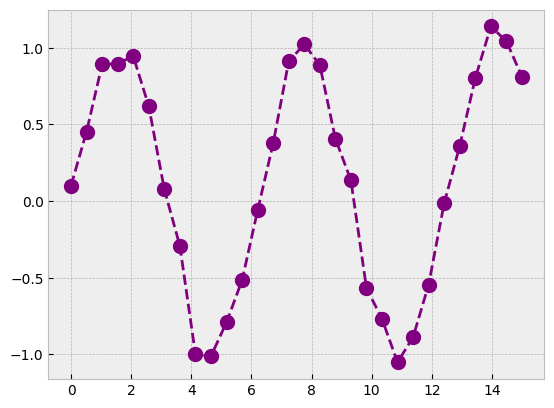

In [ ]:
plt.plot(x,y, 'o--', color='purple', lw=2, ms=10) # cambiamos la linea y los marcadores

Personalizar el tamaño usando ```figsize```

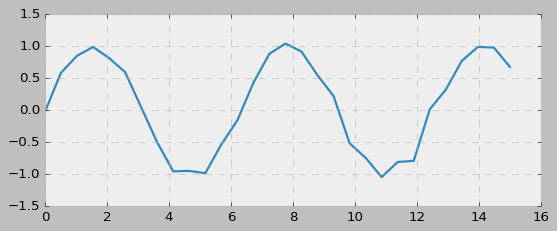

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(x,y)

Etiquetas de los ejes

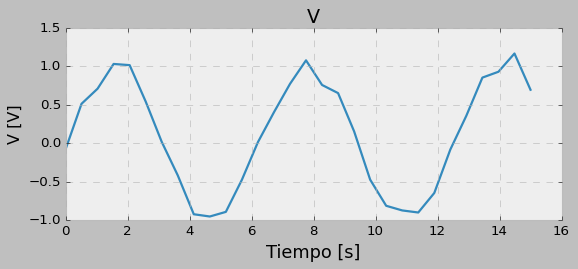

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(x,y)
plt.xlabel('Tiempo [s]', fontsize=16)
plt.ylabel('V [V]')
plt.title('V')
plt.show()

Leyenda

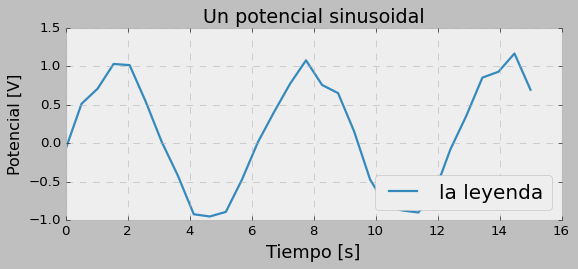

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(x,y, label='la leyenda')
plt.xlabel('Tiempo [s]', fontsize=16)
plt.ylabel('Potencial [V]')
plt.title('Un potencial sinusoidal')
plt.legend(loc='lower right', fontsize=18)
plt.show()

Se pueden poner mas de una gráfica en el mismo plot

In [ ]:
x2 = np.linspace(0, 15, 100)
y2 = np.sin(x2)

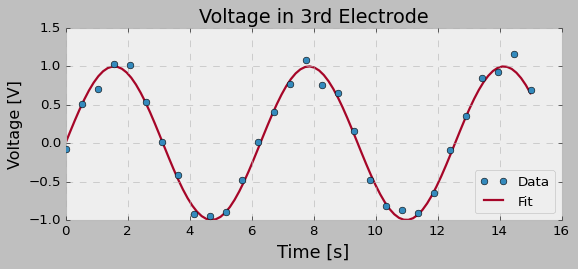

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(x,y, 'o', label='Data', zorder=100)
plt.plot(x2,y2, label='Fit')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.legend(loc='lower right', fontsize=12)
plt.show()

limitar el eje $x$ e $y$

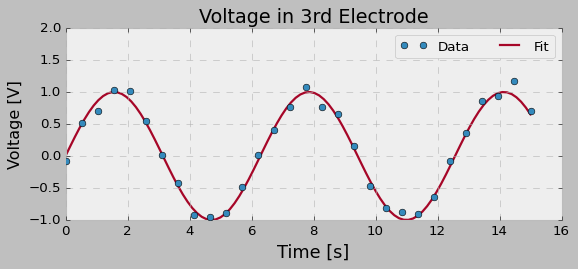

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(x,y, 'o', label='Data', zorder=100)
plt.plot(x2,y2, label='Fit')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.legend(loc='upper right', fontsize=12, ncol=2)
plt.ylim(top=2)
plt.show()

## Histograma

In [ ]:
res = np.random.randn(1000)*0.2 + 0.4

Quick Histogram

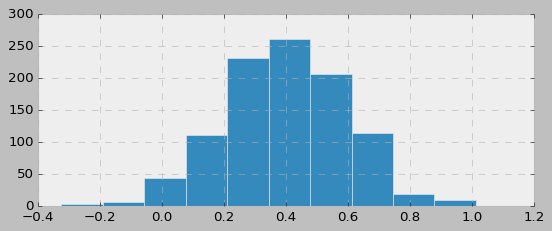

In [ ]:
plt.figure(figsize=(8,3))
plt.hist(res)
plt.show()

Cambiar el número de intervalos (clases)

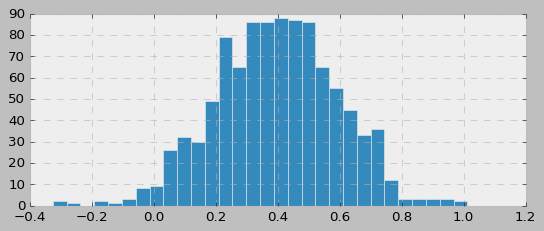

In [ ]:
plt.figure(figsize=(8,3))
plt.hist(res, bins=30)
plt.show()

Convertirlo en un gráfico de densidad

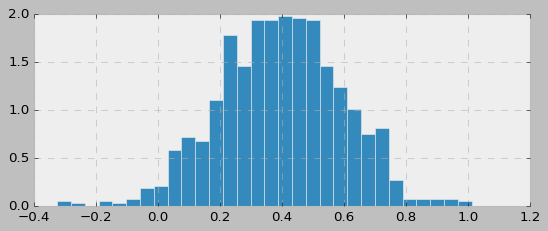

In [ ]:
plt.figure(figsize=(8,3))
plt.hist(res, bins=30, density=True)
plt.show()

Cambiando el estilo de los intervalos

In [ ]:
res2 = np.random.randn(1000)*0.2 + 0.4

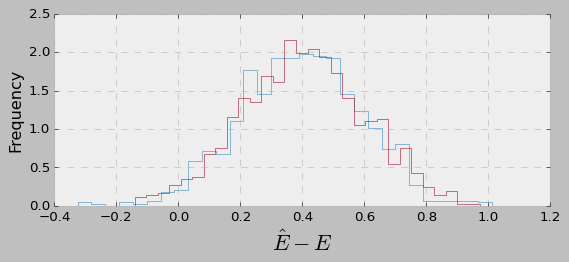

In [ ]:
plt.figure(figsize=(8,3))
plt.hist(res, bins=30, density=True, histtype='step')
plt.hist(res2, bins=30, density=True, histtype='step')
plt.xlabel('$\hat{E}-E$', fontsize=20)
plt.ylabel('Frequency')
plt.show()

# La interfaz orientada da objetos

Se hace mejor para algunos casos como

* Poner varios sub-graficos en un sólo lienzo
* Agregar texto de manera más sencilla
* Crear animaciones

En este caso, usaremos una sintaxis ligeramente distinta donde la estructura del gráfico estada dada por lo que muestra el siguiente grupo de gráficos

![](https://python-course.eu/images/numerical-programming/matplotlib_object_hierarchy_400w.webp)

La Figure es el lienzo

![](https://python-course.eu/images/numerical-programming/matplotlib_object_hierarchy2_400w.webp)

Cada Figure puede contener varios pares de ejes cartesianos Axes

![](https://python-course.eu/images/numerical-programming/matplotlib_terms_400w.webp)

Cada par de ejes a su vez tiene sus propios ejes Axis

## Un lienzo con un sólo gráfico

Usamos la función ```subplots``` que devuevle dos objetos: un lienzo, y una matriz de sistemas de ejes coordenados.
La sintaxis hace uso de que conocemos esto, y llama 'fig' al lienzo y 'ax' a los ejes de coordenadas. En este caso, sólo uno.

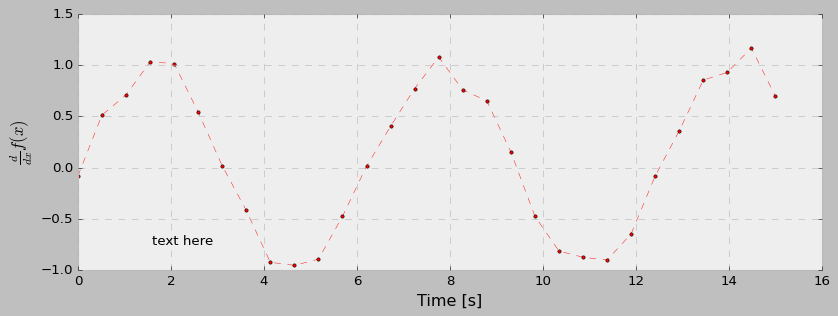

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.plot(x, y, 'o--', color='r', lw=0.4, ms=3)
ax.text(0.1, 0.1, 'text here', transform=ax.transAxes)
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$\frac{d}{dx} f(x)$', fontsize=15)
plt.show()

## Mas de un par de ejes en un lienzo

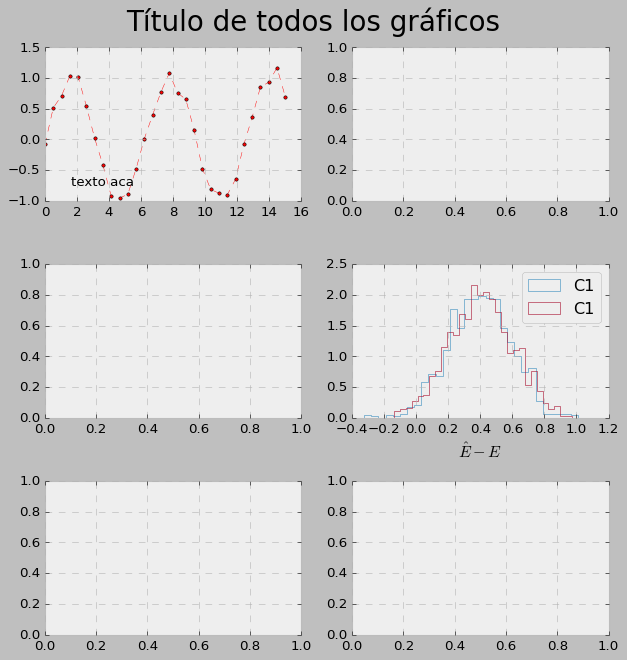

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(8,8))
ax = axes[0][0] # eje de la fila cero columna cero
ax.plot(x, y, 'o--', color='r', lw=0.4, ms=3)
ax.text(0.1, 0.1, 'texto aca', transform=ax.transAxes)
ax = axes[1][1] # eje de la fila uno, columna uno
ax.hist(res, bins=30, density=True, histtype='step', label='C1')
ax.hist(res2, bins=30, density=True, histtype='step', label='C1')
ax.set_xlabel('$\hat{E}-E$')
ax.legend()
fig.tight_layout()
fig.suptitle('Título de todos los gráficos', y=1.03, fontsize=25)
plt.show()

Achicar los ticks

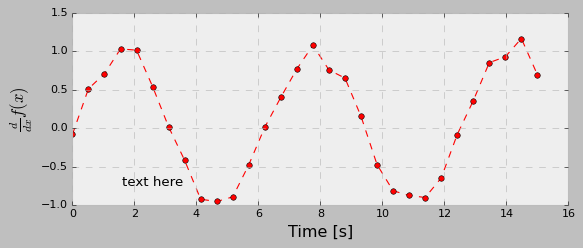

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))
ax.plot(x, y, 'o--', color='r', lw=1, ms=5)
ax.text(0.1, 0.1, 'text here', transform=ax.transAxes)
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$\frac{d}{dx} f(x)$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid('minor')
plt.show()

# Ejemplo

Agregar texto en los gráficos

In [ ]:
res_a1 = 0.2*np.random.randn(1000)+0.4
res_b1 = 0.25*np.random.randn(1000)+0.4
res_a2 = 0.21*np.random.randn(1000)+0.3
res_b2 = 0.22*np.random.randn(1000)+0.3

Si vamos a usar algún texto largo o complejo, mejor definirlo antes, para llamarlo como variable dentro del gráfico

In [ ]:
textstr1 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))))

textstr2 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a2)),
    r'$\sigma_b=%.4f$' % (np.std(res_b2))))

Hagamos el gráfico

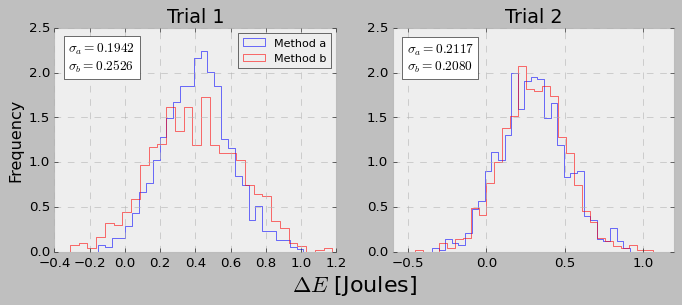

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3.5))
ax = axes[0]
ax.hist(res_a1, bins=30, density=True, histtype='step', label='Method a', color='blue')
ax.hist(res_b1, bins=30, density=True, histtype='step', label='Method b', color='red')
ax.text(0.05, 0.81, textstr1, transform=ax.transAxes,
       bbox=dict(facecolor='white', edgecolor='black'), size=12)

ax.legend(fontsize=10, fancybox=False, edgecolor='black')
ax.set_ylabel('Frequency')
ax.set_title('Trial 1')
ax = axes[1]
ax.hist(res_a2, bins=30, density=True, histtype='step', label='Method 1', color='blue')
ax.hist(res_b2, bins=30, density=True, histtype='step', label='Method 2', color='red')
ax.text(0.05, 0.81, textstr2, transform=ax.transAxes,
       bbox=dict(facecolor='white', edgecolor='black'), size=12)
ax.set_title('Trial 2')
fig.text(0.5, -0.04, '$\Delta E$ [Joules]', ha='center', size=20)
plt.savefig('trial.png', dpi=200)
plt.show()

Para personalizar aún más los gráficos y tener varios de ellos en un "mosaico" donde cada uno ocupa un espacio diferente existe la posibilidad de usar atajos que pueden consultar [acá](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/mosaic.html)

# Superficies de nivel y gráficos 2D

Generemos algunos datos

In [ ]:
plt.style.use(['default'])

In [ ]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_) # la función meshgrid genera una matriz de putos para ubicar los vectores o puntos de la superficie
z = x**2+x*y

## Superficies de nivel con relleno

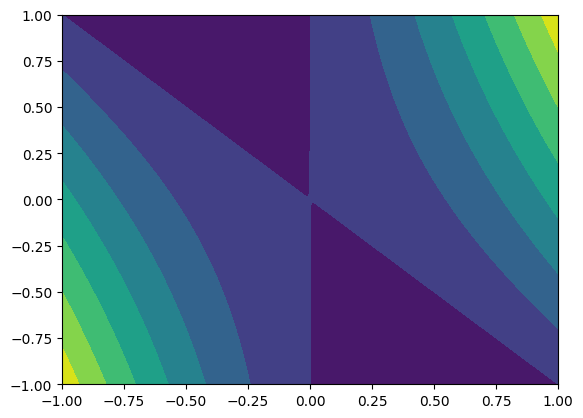

In [ ]:
plt.contourf(x,y,z)

Se pueden cambiar varias cosas de éste gráfico, consultar acá:

* ver https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py

Usando `vmin` y `vmax` ajustamos el rango de los colores

* ver https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html for all settings

Text(0, 0.5, 'Vertical Position [m]')

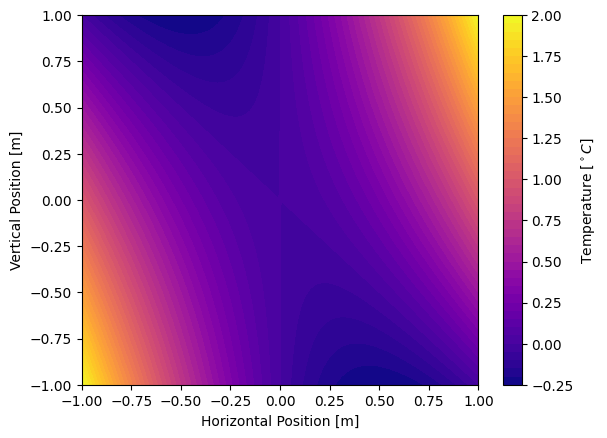

In [ ]:
plt.contourf(x,y,z, levels=50, cmap='plasma')
plt.colorbar(label='Temperature [$^\circ C$]')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')

## Superficie de nivel sin relleno

A veces nos interesa ver los valores de casda iso-curva por lo que usamos la función `clabel` y le pasamos el gráfico entero para que agregue los valores

<a list of 28 text.Text objects>

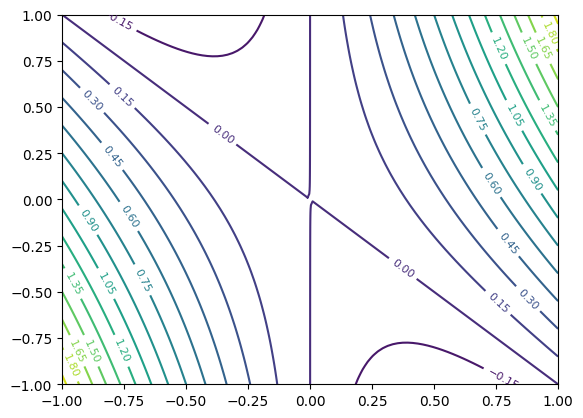

In [ ]:
cs = plt.contour(x,y,z, levels=20) # ajustando la cantidad de levels podemos tener mas líneas
plt.clabel(cs, fontsize=8)

## Superfices en 3D

Las superficies en 3d son bonitas, pero usualmente si no podemos rotarlas 360 grados no resultan muy útiles. En la parte de animaciones veremos como se hace.

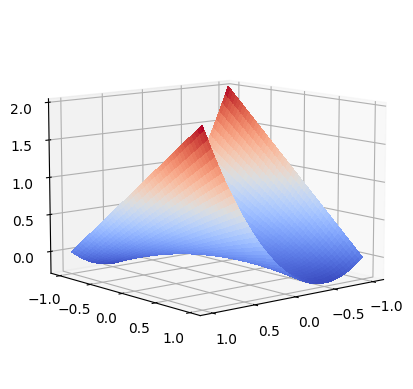

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=50)

## Gráficos de flujo: campos vectoriales

Usamos otra vez `meshgrid` para generar los puntos del espacio vectorial

In [ ]:
w = 3
_ = np.linspace(-3,3,100)
X, Y = np.meshgrid(_,_)
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

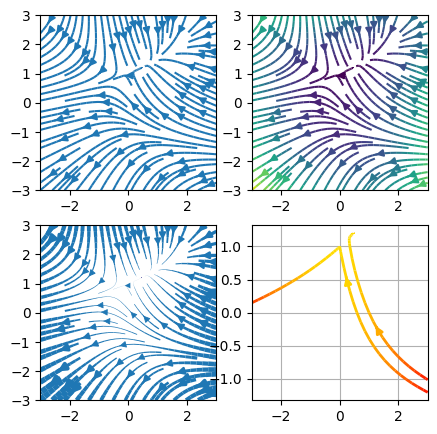

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(5,5))
ax = axes[0][0]
ax.streamplot(X, Y, U, V)
ax = axes[0][1]
ax.streamplot(X, Y, U, V, color=speed)
ax = axes[1][0]
lw = 5*speed / speed.max()
ax.streamplot(X, Y, U, V, linewidth=lw)
ax = axes[1][1]
seed_points = np.array([[0,1], [1,0]])
ax.streamplot(X, Y, U, V, color=U, linewidth=2,
                      cmap='autumn', start_points=seed_points)
ax.grid()

# Animaciones

In [ ]:
from matplotlib import animation
from matplotlib.animation import PillowWriter
# configuración para que la animación se genere y ejecute en colab
# https://stackoverflow.com/questions/61103994/embedding-matplotlib-animations-in-python-google-colab-notebook
from matplotlib import rc
rc('animation', html='jshtml')

Para hacer una animación tenemos que tener una 'foto' de cada frame (cuadro) que queramos graficar, y además decirle cuantos frames por segundo vamos a querer ver.

## Comparación de trayectorias

Vamos a comparar dos trayectorias en caída libre pero con diferente velocidad inicial

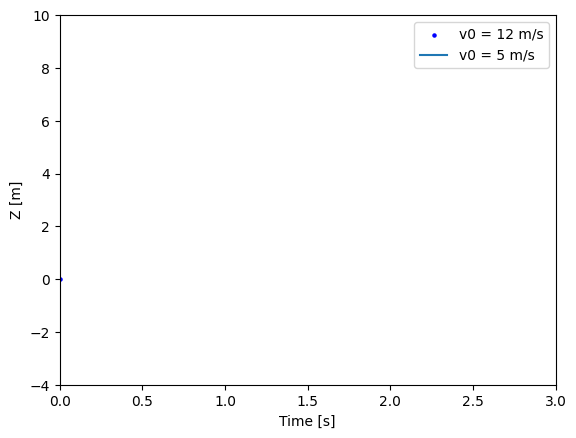

In [ ]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)


In [ ]:
ani

## Función sinusoidal en x y t

*  Veamos una onda $\sin$ moviéndose a 3m/s. Para convertirlo en una animación primero creamos una función

In [ ]:
def f(x,t):
    return np.sin(x-3*t)

x = np.linspace(0, 10*np.pi, 1000) # mil puntos entre 0 y 10pi
t = np.arange(0, 24, 1/60) # puntos entre cero y 24 con un paso de 1/60
X, T = np.meshgrid(x, t) # una grilla en 2D de los valores de x y t
F = f(X, T) # usamos la funcion f para crear la función F

Usar `linspace` y `arange` según convenga es una buena práctica, en vez de centrarse sólo en una de las dos.

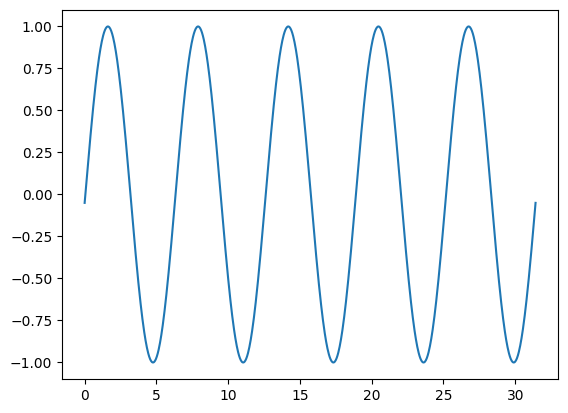

In [ ]:
plt.plot(x, F[1])
# la función en el pimer estado (t=0 y x=0) - para eso usamos meshgrid para no tener que pasar los dos valores por separado

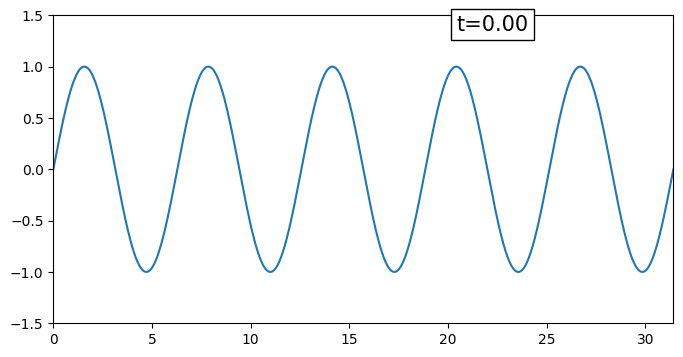

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ln1, = plt.plot([], []) # un plot vacío para ir llenándolo paso a paso
time_text = ax.text(0.65, 0.95, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'),
                    transform=ax.transAxes) # texto que se irá animando
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5, 1.5)

# creamos una función para animar nuestros valores
def animate(i):
    ln1.set_data(x, F[i])
    time_text.set_text('t={:.2f}'.format(i/60))

ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)


In [ ]:
ani

Output hidden; open in https://colab.research.google.com to view.

## Animando una superficie 3d

Volviendo a las superficies 3d, se puede hacer lo siguiente

In [ ]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
z = x**2+x*y

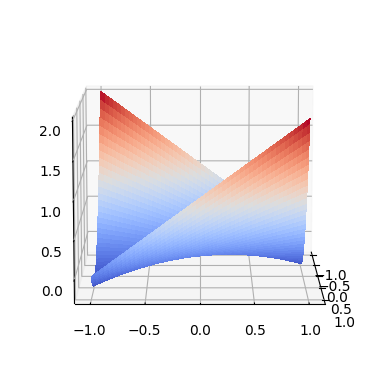

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=0)

def animate(i):
    ax.view_init(elev=10, azim=3*i)

ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
# ani.save('images/ani2.gif',writer='pillow',fps=30,dpi=100)

In [ ]:
ani

Output hidden; open in https://colab.research.google.com to view.

## Otro ejemplo

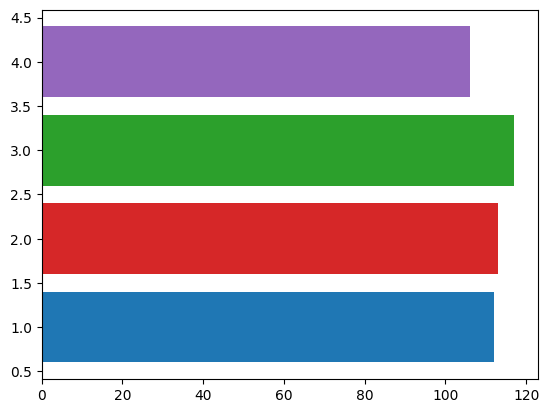

In [ ]:
fig, ax = plt.subplots()
rng = np.random.default_rng(19680801)
data = np.array([20, 20, 20, 20])
x = np.array([1, 2, 3, 4])

artists = []
colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple']
for i in range(20):
    data += rng.integers(low=0, high=10, size=data.shape)
    container = ax.barh(x, data, color=colors)
    artists.append(container)


ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
plt.show()

In [ ]:
ani

## Guardando las animaciones

Para exportar las animaciones, usamos la función `save` sobre el objeto de la animación y elegimos alguno de los formatos disponibles.

Si tenemos una animación llamada *ani*, dentro del argumento *filename* elegimos la ruta de destino (recordar que si estamos trabajando en Colab debemos tener montada una unidad de drive y especificar la ruta) junto al nombre del archivo.

Pillow

ani.save(filename="/tmp/pillow_example.gif", writer="pillow")

ani.save(filename="/tmp/pillow_example.apng", writer="pillow")

HTML

ani.save(filename="/tmp/html_example.html", writer="html")


ani.save(filename="/tmp/html_example.htm", writer="html")


ani.save(filename="/tmp/html_example.png", writer="html")

FFMpeg

ani.save(filename="/tmp/ffmpeg_example.mkv", writer="ffmpeg")

ani.save(filename="/tmp/ffmpeg_example.mp4", writer="ffmpeg")

ani.save(filename="/tmp/ffmpeg_example.mjpeg", writer="ffmpeg")

Imagemagick

ani.save(filename="/tmp/imagemagick_example.gif", writer="imagemagick"

ani.save(filename="/tmp/imagemagick_example.webp", writer="imagemagick")

# Ejercicios

## Gráficos de posición velocidad y aceleración 1

Dado un movimiento en caída libre en una dimensión con condiciones inciales arbitrarias crear en un sólo lienzo gráficas de posición, velocidad y aceleración en función del tiempo.

## Gráficos de posición velocidad y aceleración 2

Dado un movimiento armónico simple en una dimensión (con condiciones inciales aribtrarias) crear en un sólo lienzo las gráficas de posición, velocidad y aceleración en función del tiempo

## Animacion 1

Elegir alguno de los gráficos de posición anteriores y animarlo en un intervalo de tiempo adecuado para la situación elegida.

## Animación 2

Hacer un gráfico de barras que muestre la relación (en una animación) entre energía cinética y energía potencial para la caída libre del punto 1

## Superficie de nivel

Graficar una superficie de nivel para las funciones $f(x,y)=x^2+y^2$  y $f(x,y)=x^2-y^2$

## Campos vectoriales

Graficar el campo vectorial $F(x,y)=\frac{1}{2}x \hat{i}+\frac{1}{2}y \hat{j}$

pueden consultar [acá](https://www.geeksforgeeks.org/how-to-plot-a-simple-vector-field-in-matplotlib/) más sobre campos vectorialesy vectores en matplotlib.